<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PyTorch.-Основы:-синтаксис,-torch.cuda-и-torch.autograd" data-toc-modified-id="PyTorch.-Основы:-синтаксис,-torch.cuda-и-torch.autograd-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><b>PyTorch. Основы: синтаксис, torch.cuda и torch.autograd</b></a></span><ul class="toc-item"><li><span><a href="#Задача-1" data-toc-modified-id="Задача-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Задача 1</a></span></li><li><span><a href="#Задача-2" data-toc-modified-id="Задача-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Задача 2</a></span></li><li><span><a href="#Задача-3" data-toc-modified-id="Задача-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Задача 3</a></span></li><li><span><a href="#Задача-4" data-toc-modified-id="Задача-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Задача 4</a></span></li><li><span><a href="#Задача-5" data-toc-modified-id="Задача-5-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Задача 5</a></span></li></ul></li></ul></div>

---

<h2 style="text-align: center;"><b>PyTorch. Основы: синтаксис, torch.cuda и torch.autograd</b></h2>

<p style="align: center;"><img src="https://raw.githubusercontent.com/pytorch/pytorch/master/docs/source/_static/img/pytorch-logo-dark.png", width=400, height=300></p>

---

In [2]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [3]:
a = torch.FloatTensor([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]])
b = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

c = b.view(2, 2, 3)
print(c)

print(a[:, 0])

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.]],

        [[ 7.,  8.,  9.],
         [10., 11., 12.]]])
tensor([1., 2., 3.])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [4]:
a = torch.FloatTensor([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
b = torch.FloatTensor([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])

c = b.view(5, 2)
print(c)

print(a.add(c))
print(a.mul(c))
print(a.div(c))
print(a.sub(c))

tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])
tensor([[ 2.,  3.],
        [ 5.,  6.],
        [ 8.,  9.],
        [11., 12.],
        [14., 15.]])
tensor([[ 1.,  2.],
        [ 6.,  8.],
        [15., 18.],
        [28., 32.],
        [45., 50.]])
tensor([[1.0000, 0.5000],
        [0.6667, 0.5000],
        [0.6000, 0.5000],
        [0.5714, 0.5000],
        [0.5556, 0.5000]])
tensor([[ 0., -1.],
        [-1., -2.],
        [-2., -3.],
        [-3., -4.],
        [-4., -5.]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 -- 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите пару примеров с помощоью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

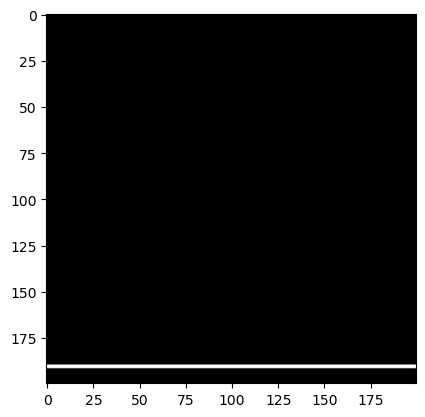

In [5]:
from matplotlib import pyplot as plt

images = torch.IntTensor(100, 200, 200, 3).zero_()

for i in range(100):
    images[i, i*2:i*2+2, :, :] = torch.full((2, 200, 3), 255)

plt.imshow(images[95])

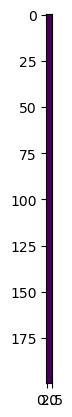

In [7]:
images = images.float().mean(0) * 70
plt.imshow(images.int())

### Задача 4

Перейдите на Google Colaboratory, чтобы работать с GPU. Загрузите туда этот ноутбук (Upload notebook)
В Colab нажмите в меню сверху: Runtime -> Change Runtime Type -> GPU, где изначально стоит None
Объявите тензор a размера (2, 3, 4) и тензор b размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (.uniform_())
Затем измените форму тензора b, чтобы она совпадала с формой тензора a, получите тензор c
Переместите c на CPU, переместите a на CPU
Оберните их в Variable()
Объявите тензор L = torch.mean((c - a) ** 2) и посчитайте градиент L по c ( то есть  ∂𝐿∂𝑐)

Выведите градиент L по c

In [8]:
import torch
from torch.autograd import Variable

a = torch.FloatTensor(2, 3, 4).uniform_()
b = torch.FloatTensor(1, 8, 3).uniform_()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

c = b.view(a.shape)

c = c.to(device)
a = a.to(device)

c = Variable(c, requires_grad=True)
a = Variable(a, requires_grad=True)

L = torch.mean((c - a) ** 2)
L.backward()
c.grad

tensor([[[ 0.0135, -0.0413,  0.0247, -0.0046],
         [-0.0168, -0.0365,  0.0172, -0.0580],
         [ 0.0131, -0.0471,  0.0106, -0.0035]],

        [[ 0.0328,  0.0060, -0.0773, -0.0079],
         [ 0.0427, -0.0566,  0.0094, -0.0189],
         [-0.0174,  0.0786,  0.0644, -0.0111]]])

In [9]:
c.data

tensor([[[0.7787, 0.4631, 0.3734, 0.0602],
         [0.2204, 0.4738, 0.8330, 0.0533],
         [0.1788, 0.3000, 0.2809, 0.0559]],

        [[0.8711, 0.5535, 0.0700, 0.7135],
         [0.9939, 0.2377, 0.2271, 0.4766],
         [0.2909, 0.9805, 0.7957, 0.3042]]])

### Задача 5

Доработайте многослойную нейронную сеть из файла "6_3 mlp pytorch tasks".